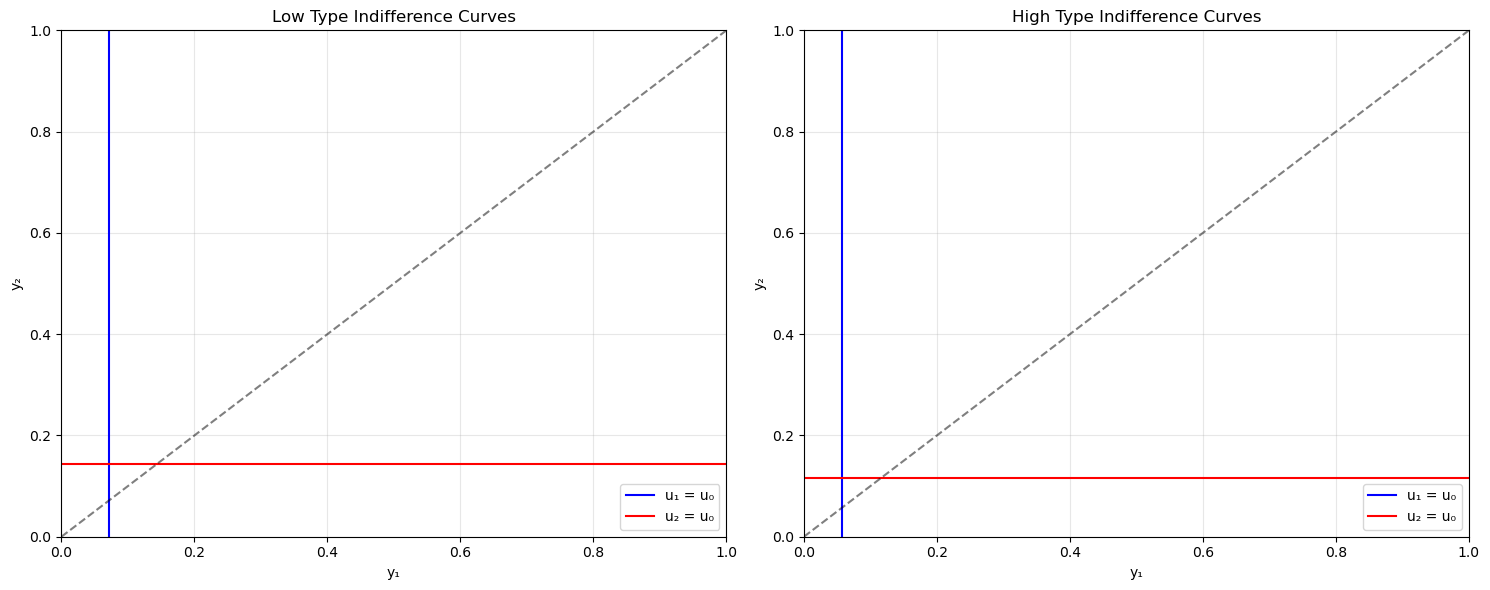

Low type thresholds: y1 = 0.072, y2 = 0.144
High type thresholds: y1 = 0.058, y2 = 0.116


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta_x = 0.8
s_1 = 0.05
s_2 = 0.1
p_0, p_1, p_2 = 0.33, 0.33, 0.33
q_0, q_1, q_2 = 0.33, 0.33, 0.33

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Domain for y1
y1_dom = np.linspace(0, 1, 1000)

# Low type

# u_1 = u_0: solve s_1 = theta_x*((1-q_2-q_0)*0 + (q_2+q_0)*y1) + (1-theta_x)*((1-p_2-p_0)*y1/2 + (p_2+p_0)*y1)
def y1_threshold_low():
    return s_1 / (theta_x*(q_2+q_0) + (1-theta_x)*((1-p_2-p_0)/2 + (p_2+p_0)))

# u_2 = u_0: solve s_2 = theta_x*((1-q_1-q_0)*0 + (q_1+q_0)*y2) + (1-theta_x)*((1-p_1-p_0)*y2/2 + (p_1+p_0)*y2)
def y2_threshold_low():
    return s_2 / (theta_x*(q_1+q_0) + (1-theta_x)*((1-p_1-p_0)/2 + (p_1+p_0)))

# Plot for low type
y1_thresh_l = y1_threshold_low()
y2_thresh_l = y2_threshold_low()

ax1.axvline(x=y1_thresh_l, color='blue', label='u₁ = u₀')
ax1.axhline(y=y2_thresh_l, color='red', label='u₂ = u₀')
ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5)

# High type

# u_1 = u_0: solve s_1 = theta_x*((1-q_2-q_0)*y1/2 + (q_2+q_0)*y1) + (1-theta_x)*y1
def y1_threshold_high():
    return s_1 / (theta_x*((1-q_2-q_0)/2 + (q_2+q_0)) + (1-theta_x))

# u_2 = u_0: solve s_2 = theta_x*((1-q_1-q_0)*y2/2 + (q_1+q_0)*y2) + (1-theta_x)*y2
def y2_threshold_high():
    return s_2 / (theta_x*((1-q_1-q_0)/2 + (q_1+q_0)) + (1-theta_x))

# Plot for high type
y1_thresh_h = y1_threshold_high()
y2_thresh_h = y2_threshold_high()

ax2.axvline(x=y1_thresh_h, color='blue', label='u₁ = u₀')
ax2.axhline(y=y2_thresh_h, color='red', label='u₂ = u₀')
ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5)

# Formatting for both plots
for ax in [ax1, ax2]:
    ax.set_xlabel('y₁')
    ax.set_ylabel('y₂')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend()

ax1.set_title('Low Type Indifference Curves')
ax2.set_title('High Type Indifference Curves')

plt.tight_layout()
plt.show()

# Print threshold values
print(f"Low type thresholds: y1 = {y1_thresh_l:.3f}, y2 = {y2_thresh_l:.3f}")
print(f"High type thresholds: y1 = {y1_thresh_h:.3f}, y2 = {y2_thresh_h:.3f}")

NameError: name 'y2' is not defined

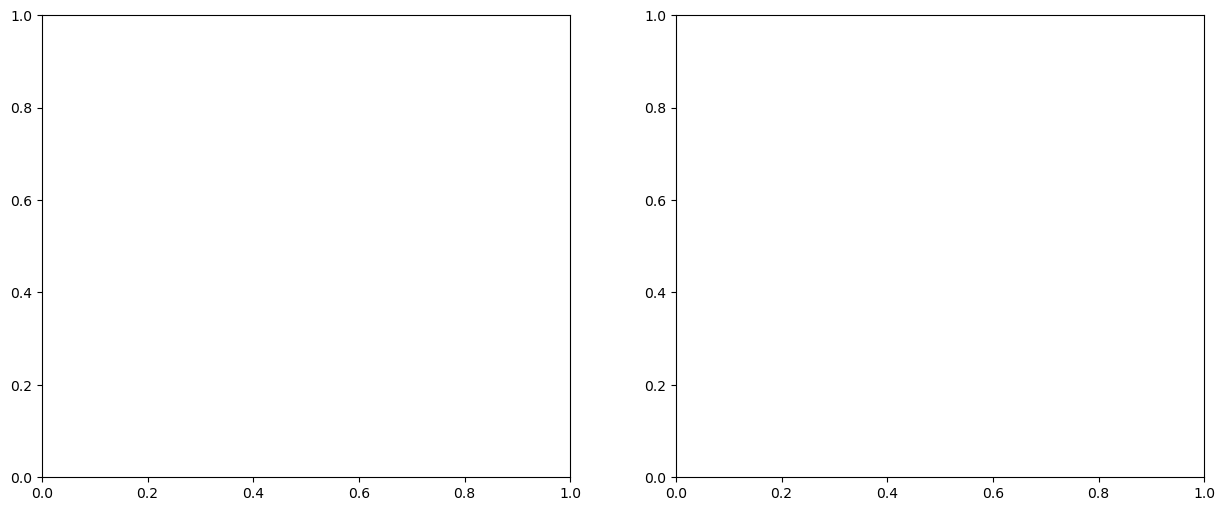

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta_x = 0.2
s_1 = 0.3
s_2 = 0.3
p_0, p_1, p_2 = 0.33, 0.33, 0.33
q_0, q_1, q_2 = 0.33, 0.33, 0.33

# Low type indifference curves

# u₁ = u₂
def y2_u1_eq_u2_low(y1):
    # y1 > y2 case
    numer_gt = y1 * (theta_x*(q_2+q_0) + (1-theta_x)*(1/2 + p_2/2 + p_0/2)) - (s_1 - s_2)
    denom_gt = theta_x*(q_1+q_0) + (1-theta_x)*(1/2 + p_1/2 + p_0/2)
    y2_gt = numer_gt / denom_gt
    
    # y1 < y2 case
    numer_lt = y1 * (theta_x*(q_2+q_0) + (1-theta_x)*(1/2 + p_2/2 + p_0/2)) - (s_1 - s_2)
    denom_lt = theta_x*(q_1+q_0) + (1-theta_x)*(1 + p_1 + p_0)
    y2_lt = numer_lt / denom_lt
    
    return np.where(y1 > y2_gt, y2_gt, y2_lt)

# u_b = u₁
def y2_ub_eq_u1_low(y1):
    # y1 > y2 case
    numer_gt = s_2 + y1 * (theta_x*(q_1) + (1-theta_x)*(p_1/2))
    denom_gt = theta_x*(q_1+q_0) + (1-theta_x)*(1/2 + p_1/2 + p_0/2)
    y2_gt = numer_gt / denom_gt
    
    # y1 < y2 case
    numer_lt = s_2 + y1 * (theta_x*(q_2) + (1-theta_x)*(p_2/2))
    denom_lt = theta_x*(q_1+q_0) + (1-theta_x)*(1 + p_1 + p_0)
    y2_lt = numer_lt / denom_lt
    
    return np.where(y1 > y2_gt, y2_gt, y2_lt)

# u_b = u₂
def y2_ub_eq_u2_low(y1):
    # y1 > y2 case
    numer_gt = s_1 + y2 * (theta_x*(q_2) + (1-theta_x)*(p_2/2))
    denom_gt = theta_x*(q_2+q_0) + (1-theta_x)*(1/2 + p_2/2 + p_0/2)
    y2_gt = numer_gt / denom_gt
    
    # y1 < y2 case
    numer_lt = s_1 + y2 * (theta_x*(q_1) + (1-theta_x)*(p_1/2))
    denom_lt = theta_x*(q_2+q_0) + (1-theta_x)*(1 + p_2 + p_0)
    y2_lt = numer_lt / denom_lt
    
    return np.where(y1 > y2_gt, y2_gt, y2_lt)

# High type indifference curves

# u₁ = u₂
def y2_u1_eq_u2_high(y1):
    # y1 > y2 case
    numer_gt = y1 * (theta_x*((1-q_2-q_0)/2 + q_2+q_0) + (1-theta_x)) - (s_1 - s_2)
    denom_gt = theta_x*((1-q_1-q_0)/2 + q_1+q_0) + (1-theta_x)
    y2_gt = numer_gt / denom_gt
    
    # y1 < y2 case
    numer_lt = y1 * (theta_x*((1-q_2-q_0)/2 + q_2+q_0) + (1-theta_x)) - (s_1 - s_2)
    denom_lt = theta_x*(q_1+q_0) + (1-theta_x)
    y2_lt = numer_lt / denom_lt
    
    return np.where(y1 > y2_gt, y2_gt, y2_lt)

# u_b = u₁
def y2_ub_eq_u1_high(y1):
    # y1 > y2 case
    numer_gt = s_2 + y1 * (theta_x*((1-q_1)/2) + (1-theta_x))
    denom_gt = theta_x*((1-q_1-q_0)/2 + q_1+q_0) + (1-theta_x)
    y2_gt = numer_gt / denom_gt
    
    # y1 < y2 case
    numer_lt = s_2 + y1 * (theta_x*((1-q_2)/2) + (1-theta_x))
    denom_lt = theta_x*(q_1+q_0) + (1-theta_x)
    y2_lt = numer_lt / denom_lt
    
    return np.where(y1 > y2_gt, y2_gt, y2_lt)

# u_b = u₂
def y2_ub_eq_u2_high(y1):
    # y1 > y2 case
    numer_gt = s_1 + y2 * (theta_x*((1-q_2)/2) + (1-theta_x))
    denom_gt = theta_x*((1-q_2-q_0)/2 + q_2+q_0) + (1-theta_x)
    y2_gt = numer_gt / denom_gt
    
    # y1 < y2 case
    numer_lt = s_1 + y2 * (theta_x*((1-q_1)/2) + (1-theta_x))
    denom_lt = theta_x*(q_2+q_0) + (1-theta_x)
    y2_lt = numer_lt / denom_lt
    
    return np.where(y1 > y2_gt, y2_gt, y2_lt)

# Domain for y1
y1_dom = np.linspace(0, 1, 1000)

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot low type curves
y2_vals_12 = y2_u1_eq_u2_low(y1_dom)
y2_vals_b1 = y2_ub_eq_u1_low(y1_dom)
y2_vals_b2 = y2_ub_eq_u2_low(y1_dom)

ax1.plot(y1_dom, y2_vals_12, 'blue', label='u₁ = u₂')
ax1.plot(y1_dom, y2_vals_b1, 'red', label='u_b = u₁')
ax1.plot(y1_dom, y2_vals_b2, 'green', label='u_b = u₂')

# Plot high type curves
y2_vals_12 = y2_u1_eq_u2_high(y1_dom)
y2_vals_b1 = y2_ub_eq_u1_high(y1_dom)
y2_vals_b2 = y2_ub_eq_u2_high(y1_dom)

ax2.plot(y1_dom, y2_vals_12, 'blue', label='u₁ = u₂')
ax2.plot(y1_dom, y2_vals_b1, 'red', label='u_b = u₁')
ax2.plot(y1_dom, y2_vals_b2, 'green', label='u_b = u₂')

# Add y1 = y2 line and formatting
for ax in [ax1, ax2]:
    ax.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='y₁ = y₂')
    ax.set_xlabel('y₁')
    ax.set_ylabel('y₂')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend()

ax1.set_title('Low Type Indifference Curves')
ax2.set_title('High Type Indifference Curves')

plt.tight_layout()
plt.show()